# Comparison of Models 

In [1]:
# importing dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import lazypredict.Supervised as lzp

C:\Users\deepd\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [11]:
# reading the file
cough_data = pd.read_csv('all_features.csv')
cough_data.shape

(195, 731)

In [3]:
cough_data.head()

,label,spectral_centroid_mean,spectral_centroid_std,spectral_centroid_median,spectral_centroid_max,spectral_centroid_min,spectral_centroid_quartile_1st,spectral_centroid_quartile_3rd,spectral_centroid_interquartilerange,spectral_centroid_skewness,...,vggish_feature_std.118,vggish_feature_std.119,vggish_feature_std.120,vggish_feature_std.121,vggish_feature_std.122,vggish_feature_std.123,vggish_feature_std.124,vggish_feature_std.125,vggish_feature_std.126,vggish_feature_std.127
0,0.00,2067.38,595.30,2076.12,4179.15,708.67,1629.15,2470.99,841.84,0.49,...,-0.78,-0.17,0.09,-0.37,-0.25,0.12,-0.13,-0.09,-0.21,-0.54
1,1.00,2455.76,1035.04,2692.79,4629.34,0.00,1866.12,3267.20,1401.09,-0.76,...,-0.46,0.21,0.16,-0.31,-0.25,0.43,0.06,-0.09,-0.21,-0.34
2,1.00,2934.96,1107.07,3118.39,5339.46,743.43,2247.07,3711.15,1464.08,-0.22,...,-0.68,-0.10,0.19,-0.32,-0.07,0.24,-0.03,-0.15,-0.43,-0.29
3,0.00,2288.21,967.49,2138.40,3956.37,467.76,1524.06,3197.04,1672.97,0.01,...,-0.65,-0.14,0.08,-0.35,-0.04,0.04,-0.17,-0.39,-0.14,-0.32
4,0.00,1901.79,601.62,1811.02,3604.11,0.00,1466.70,2274.14,807.44,0.46,...,-0.52,0.13,0.03,-0.08,-0.16,0.41,-0.04,-0.16,-0.22,-0.25


In [4]:
# splitting the rows into train and validation set for training
features = cough_data.drop(['label'],axis=1)
labels = cough_data['label']
train_features,validation_features,train_label,validation_label = train_test_split(features,labels,test_size=.2,random_state=123)


In [5]:
# using Lazypredict library to compare different models with accuracy
clf = lzp.LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
model_train,predictions_train = clf.fit(train_features,train_features,train_label,train_label)
model_validation,predictions_validation = clf.fit(train_features,validation_features,train_label,validation_label)

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:04<00:00,  6.40it/s]


In [6]:
# Results for training set
model_train

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
AdaBoostClassifier,1.00,1.00,1.00,1.00,0.91
LabelSpreading,1.00,1.00,1.00,1.00,0.08
XGBClassifier,1.00,1.00,1.00,1.00,0.33
SGDClassifier,1.00,1.00,1.00,1.00,0.07
RidgeClassifierCV,1.00,1.00,1.00,1.00,0.09
RidgeClassifier,1.00,1.00,1.00,1.00,0.08
RandomForestClassifier,1.00,1.00,1.00,1.00,0.50
QuadraticDiscriminantAnalysis,1.00,1.00,1.00,1.00,0.09
Perceptron,1.00,1.00,1.00,1.00,0.06


In [7]:
# models for validation set
model_validation

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
DecisionTreeClassifier,0.77,0.79,0.79,0.77,0.11
KNeighborsClassifier,0.74,0.75,0.75,0.75,0.07
NuSVC,0.72,0.73,0.73,0.72,0.10
AdaBoostClassifier,0.69,0.70,0.70,0.70,0.94
SVC,0.67,0.69,0.69,0.67,0.10
RandomForestClassifier,0.67,0.66,0.66,0.67,0.51
SGDClassifier,0.64,0.66,0.66,0.65,0.06
ExtraTreesClassifier,0.67,0.65,0.65,0.67,0.30
LogisticRegression,0.64,0.64,0.64,0.65,0.10


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 <a list of 28 Text major ticklabel objects>)

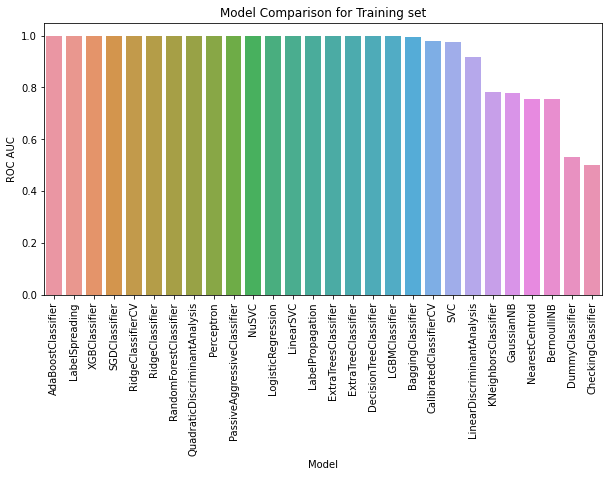

In [8]:
# plotting ROC AUC for training set
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=model_train.index, y="ROC AUC", data=model_train)
plt.title("Model Comparison for Training set")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 <a list of 28 Text major ticklabel objects>)

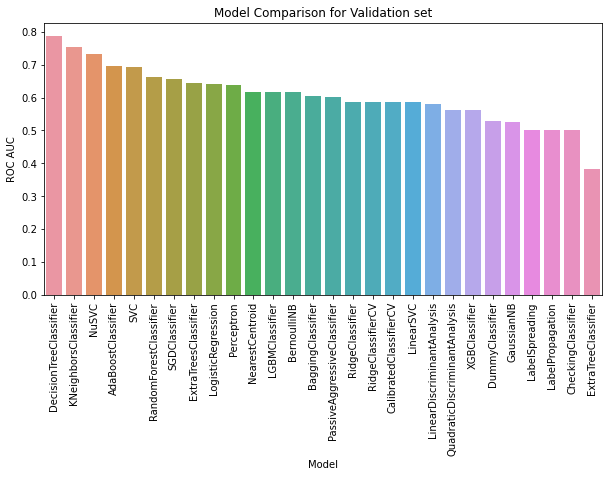

In [9]:
# plotting ROC AUC for validation set
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=model_validation.index, y="ROC AUC", data=model_validation)
plt.title("Model Comparison for Validation set")
plt.xticks(rotation=90)

## Comparison of Models after applying PCA

In [12]:
# we are taking PCA=0.99 i.e 99% variance explained
pca = PCA(n_components=.99)
reduced_features = pca.fit_transform(features)

In [13]:
# splitting the observations into train and validation set
train_features,validation_features,train_label,validation_label = train_test_split(features,labels,test_size=.2,random_state=123)

In [14]:
# using Lazypredict library to compare different models with accuracy
clf = lzp.LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
model_train,predictions_train = clf.fit(train_features,train_features,train_label,train_label)
model_validation,predictions_validation = clf.fit(train_features,validation_features,train_label,validation_label)

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:04<00:00,  6.15it/s]


In [15]:
# Results for training set
model_train

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
AdaBoostClassifier,1.00,1.00,1.00,1.00,0.99
LabelSpreading,1.00,1.00,1.00,1.00,0.07
XGBClassifier,1.00,1.00,1.00,1.00,0.35
SGDClassifier,1.00,1.00,1.00,1.00,0.06
RidgeClassifierCV,1.00,1.00,1.00,1.00,0.09
RidgeClassifier,1.00,1.00,1.00,1.00,0.08
RandomForestClassifier,1.00,1.00,1.00,1.00,0.46
QuadraticDiscriminantAnalysis,1.00,1.00,1.00,1.00,0.08
Perceptron,1.00,1.00,1.00,1.00,0.06


In [16]:
# models for validation set
model_validation

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
DecisionTreeClassifier,0.77,0.79,0.79,0.77,0.11
KNeighborsClassifier,0.74,0.75,0.75,0.75,0.08
NuSVC,0.72,0.73,0.73,0.72,0.10
AdaBoostClassifier,0.69,0.70,0.70,0.70,1.15
SVC,0.67,0.69,0.69,0.67,0.09
RandomForestClassifier,0.67,0.66,0.66,0.67,0.50
SGDClassifier,0.64,0.66,0.66,0.65,0.07
ExtraTreesClassifier,0.67,0.65,0.65,0.67,0.30
LogisticRegression,0.64,0.64,0.64,0.65,0.11


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 <a list of 28 Text major ticklabel objects>)

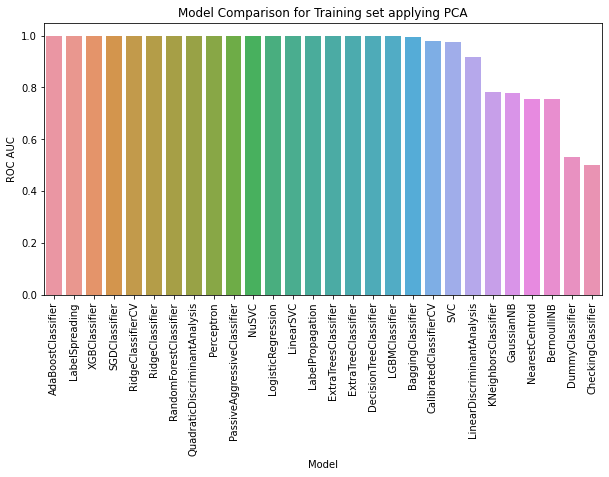

In [17]:
# plotting ROC AUC for training set
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=model_train.index, y="ROC AUC", data=model_train)
plt.title("Model Comparison for Training set applying PCA")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 <a list of 28 Text major ticklabel objects>)

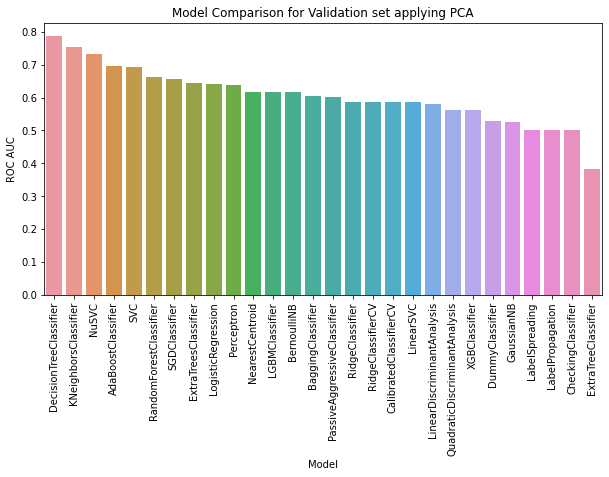

In [18]:
# plotting ROC AUC for training set
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=model_validation.index, y="ROC AUC", data=model_validation)
plt.title("Model Comparison for Validation set applying PCA")
plt.xticks(rotation=90)

So, we can see that we are getting a ROC-AUC score of 79% without any hyperparameter tuning.Although, this can't perfectly distinguish between COVID and Non-COVID cough but this definately shows promise. 

### Future work for increasing accuray 

I will try to get much more samples from different sources for a good modelling and also use Data Augmentation. Apart from that, I am thinking to use more respiratory data apart from cough i.e breathing,speech etc, then train them individually into a metamodel and then using those result to predict actual label. This is like 'stacking' in ensembling technique.